In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install bioinfokit
from bioinfokit.visuz import cluster

                                              0.0/87.0 kB ? eta -:--:--
     -----------------                      41.0/87.0 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 87.0/87.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/9.4 MB ? eta -:--:--
                                              0.0/9.4 MB ? eta -:--:--
                                              0.0/9.4 MB 325.1 kB/s eta 0:00:29
        


[notice] A new release of pip is available: 23.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
df = pd.read_csv("./data/mcdonalds.csv")

In [88]:
df.shape

(1453, 15)

In [89]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [91]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [92]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [93]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [94]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

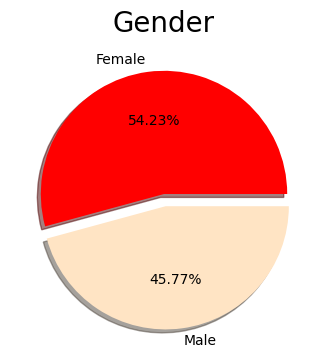

In [95]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'bisque']
explode = [0, 0.1]
plt.figure(figsize=(5, 4))
plt.pie(size, colors = colors, explode = explode, shadow=True, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.show()



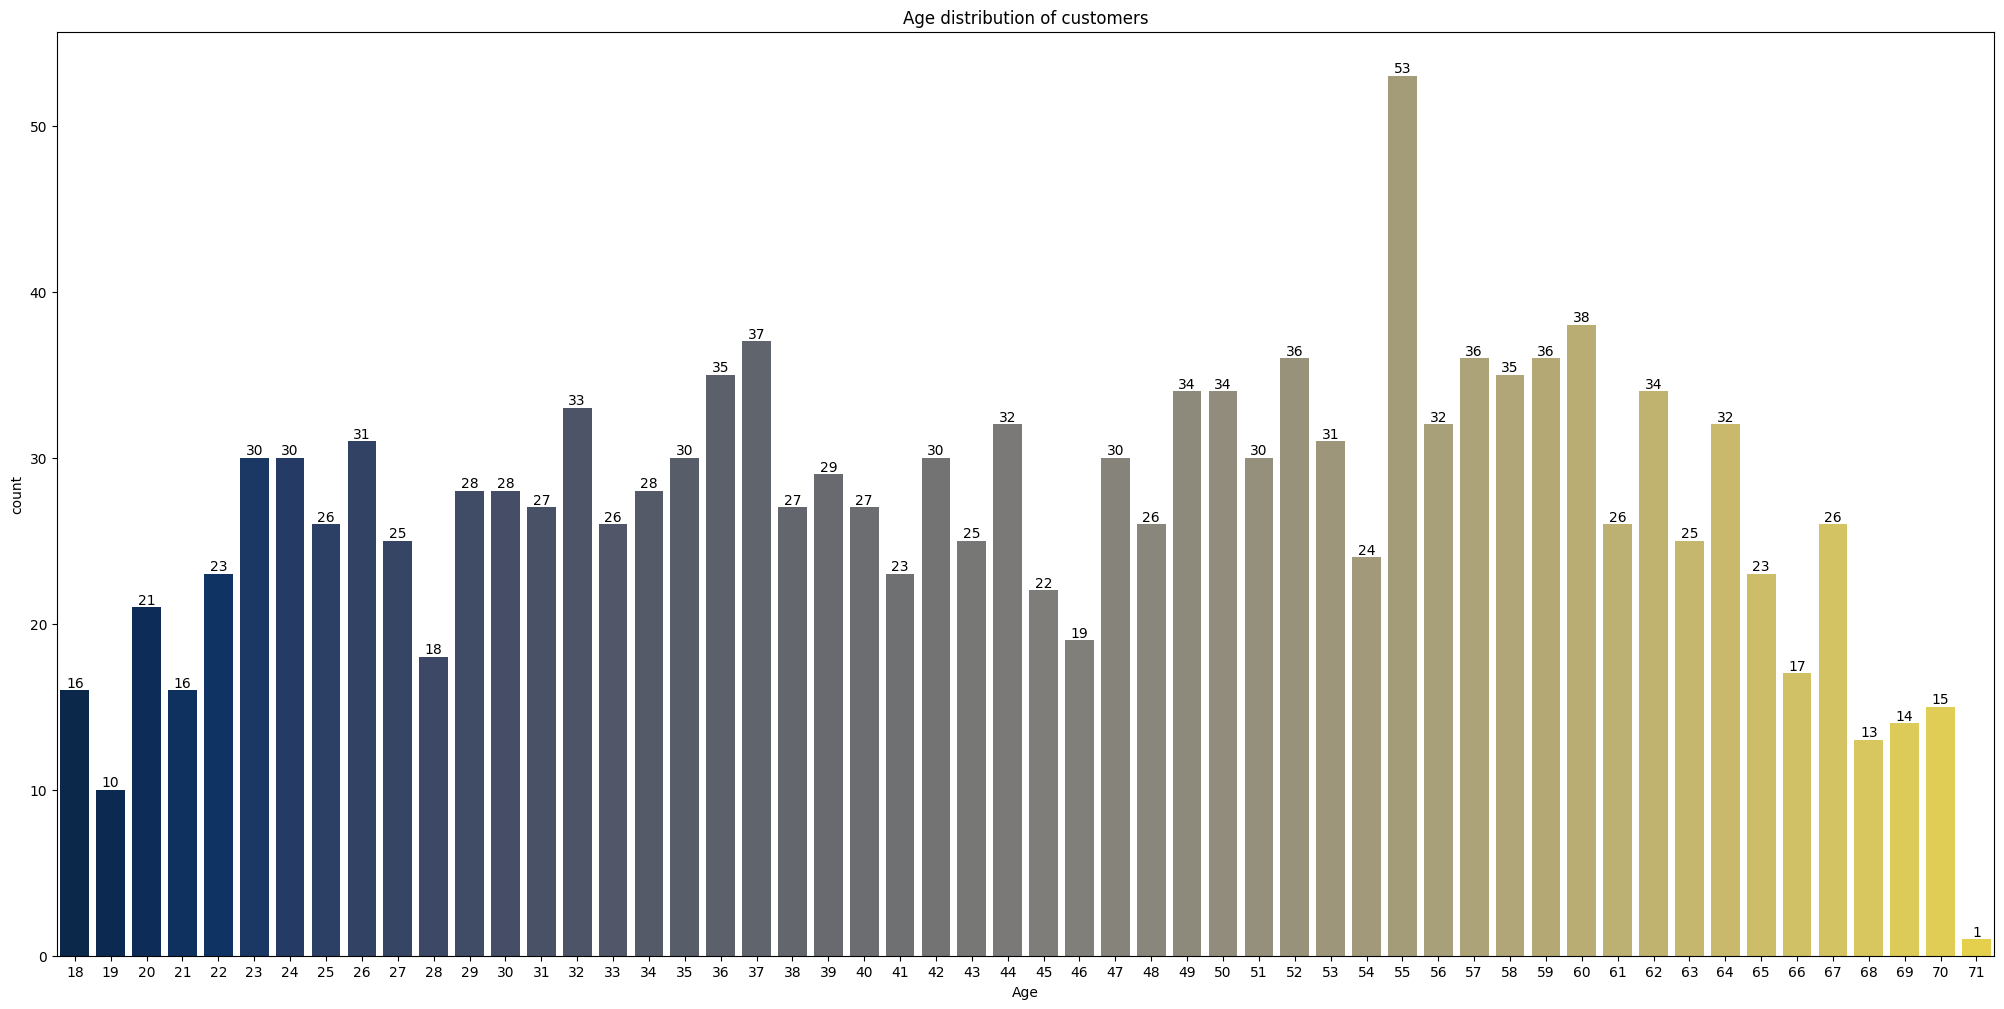

In [96]:
plt.rcParams['figure.figsize'] = (25, 12)
f = sns.countplot(x=df['Age'],palette = 'cividis')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

In [97]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

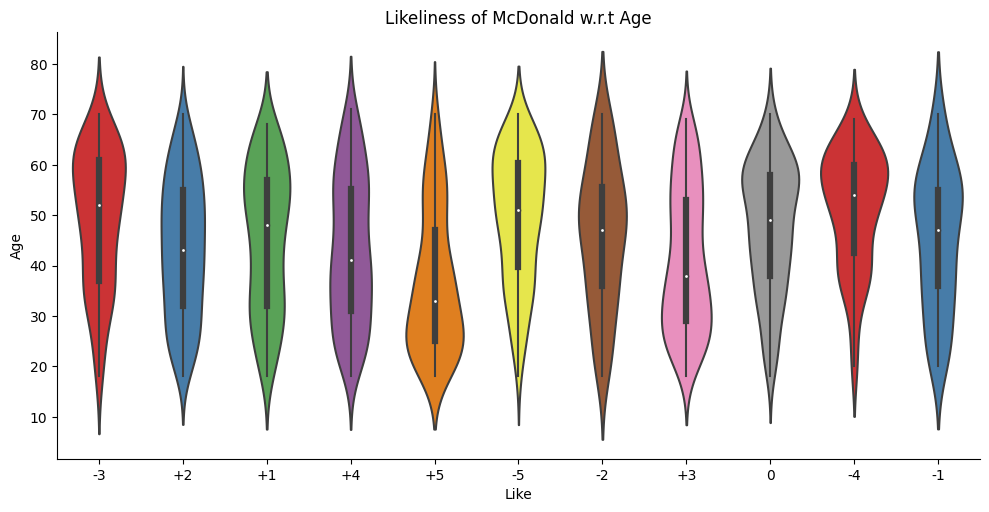

In [98]:
sns.catplot(x="Like", y="Age",data=df, orient="v", height=5, aspect=2, palette="Set1", kind="violin")
plt.title('Likeliness of McDonald w.r.t Age')
plt.show()

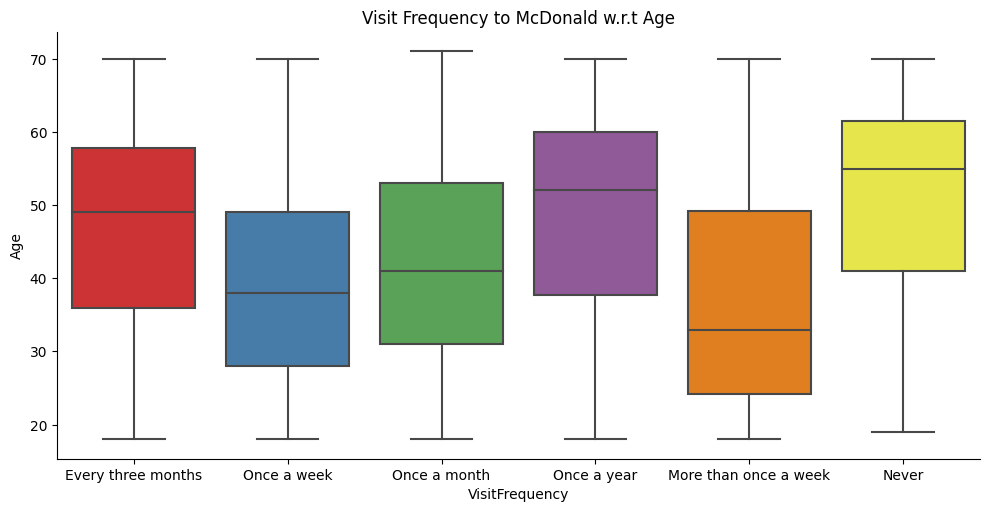

In [99]:
sns.catplot(x="VisitFrequency", y="Age",data=df, orient="v", height=5, aspect=2, palette="Set1", kind="box")
plt.title('Visit Frequency to McDonald w.r.t Age')
plt.show()

In [100]:
from sklearn.preprocessing import LabelEncoder

def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
    
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [101]:
df_segments = df.loc[:,cat]
df_segments

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [102]:
# for i in cat:
#     print(df_segments[i].value_counts())

def percentage_of_feature_values(df, feature, target_value):
    total_count = df[feature].count()
    target_count = df[feature].eq(target_value).sum()
    percentage = (target_count / total_count) * 100
    result = {
        "column_name": feature,
        "target_value": target_value,
        "percentage": round(percentage, 2)
    }
    return result

for i in cat:
    print(percentage_of_feature_values(df_segments, i, 1))
    print(percentage_of_feature_values(df_segments, i, 0))

{'column_name': 'yummy', 'target_value': 1, 'percentage': 55.26}
{'column_name': 'yummy', 'target_value': 0, 'percentage': 44.74}
{'column_name': 'convenient', 'target_value': 1, 'percentage': 90.78}
{'column_name': 'convenient', 'target_value': 0, 'percentage': 9.22}
{'column_name': 'spicy', 'target_value': 1, 'percentage': 9.36}
{'column_name': 'spicy', 'target_value': 0, 'percentage': 90.64}
{'column_name': 'fattening', 'target_value': 1, 'percentage': 86.72}
{'column_name': 'fattening', 'target_value': 0, 'percentage': 13.28}
{'column_name': 'greasy', 'target_value': 1, 'percentage': 52.65}
{'column_name': 'greasy', 'target_value': 0, 'percentage': 47.35}
{'column_name': 'fast', 'target_value': 1, 'percentage': 90.02}
{'column_name': 'fast', 'target_value': 0, 'percentage': 9.98}
{'column_name': 'cheap', 'target_value': 1, 'percentage': 59.88}
{'column_name': 'cheap', 'target_value': 0, 'percentage': 40.12}
{'column_name': 'tasty', 'target_value': 1, 'percentage': 64.42}
{'column_n

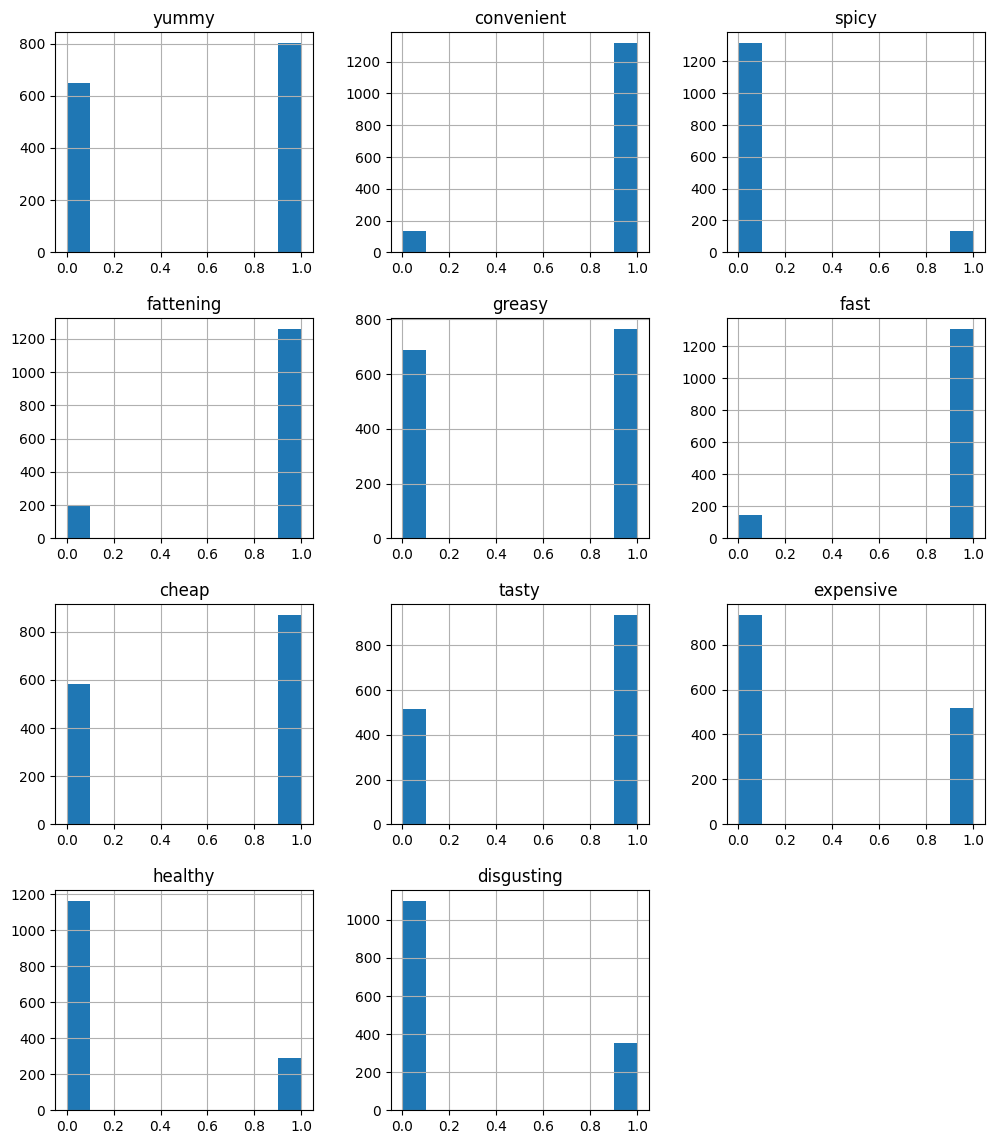

In [103]:
plt.rcParams['figure.figsize'] = (12,14)
df_segments.hist()
plt.show()

In [104]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [105]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [106]:
df_segments.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [67]:
df.to_csv("./data/mcdonalds_cleaned.csv")

In [68]:
df_segments.to_csv("./data/mcdonals_segments.csv")

In [107]:
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)

In [108]:
pca = PCA(n_components=11)
pca_fit = pca.fit_transform(x_scaled)


In [109]:
components = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pca_df = pd.DataFrame(data = pca_fit, columns = components)
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


In [110]:
variance_components = pca.explained_variance_
variance_components

array([2.81316617, 1.6329477 , 1.38111047, 1.08171127, 0.91895162,
       0.78253978, 0.71533376, 0.59270042, 0.52426978, 0.3078135 ,
       0.25703129])

In [111]:
variance_components_ratio = pca.explained_variance_ratio_
variance_components_ratio

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [112]:
standard_deviation_components = np.sqrt(variance_components)
standard_deviation_components

array([1.67724959, 1.27786842, 1.17520657, 1.04005349, 0.95861964,
       0.88461278, 0.84577406, 0.76987039, 0.72406476, 0.55480943,
       0.50698253])

In [113]:
standard_deviation_components_ratio = standard_deviation_components / np.sum(standard_deviation_components)
standard_deviation_components_ratio

array([0.16104   , 0.12269368, 0.11283667, 0.09986004, 0.09204123,
       0.08493551, 0.08120643, 0.07391859, 0.0695206 , 0.05326966,
       0.04867759])

In [114]:
cumulative_sum_components_ratio = np.cumsum(pca.explained_variance_ratio_)
cumulative_sum_components_ratio

array([0.25556637, 0.40391399, 0.52938308, 0.62765279, 0.71113635,
       0.78222737, 0.84721295, 0.90105773, 0.94868581, 0.9766496 ,
       1.        ])

In [116]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_segments.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


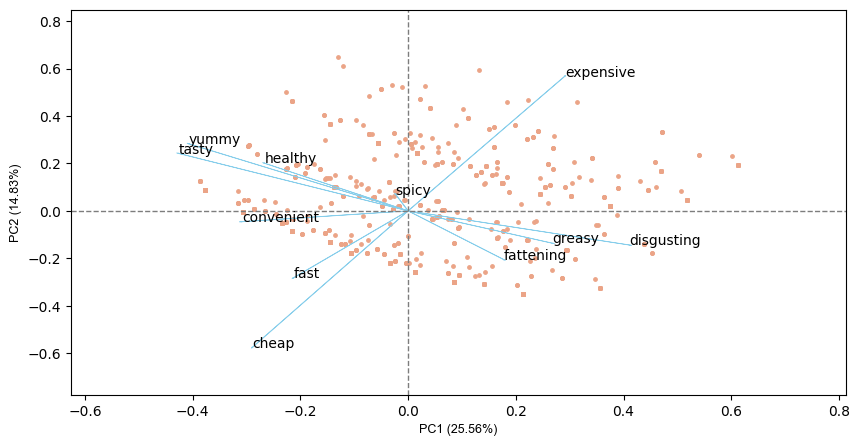

In [121]:
pca_scores = PCA().fit_transform(x_scaled)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings = loadings, labels = df_segments.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(10,5))